<a href="https://colab.research.google.com/github/Shaik1903/Learning_Pytorch/blob/main/Pytorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import sklearn

In [44]:
from  sklearn.datasets import make_circles

In [45]:
n_samples = 1000

In [46]:
X,y = make_circles(n_samples,noise = 0.03, random_state = 42)

In [47]:
print(X[:5])
print(y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [48]:
import pandas as pd

In [49]:
circles =  pd.DataFrame({'X1': X[:,0],'X2': X[:,1],'label':y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [50]:
import matplotlib.pyplot as plt

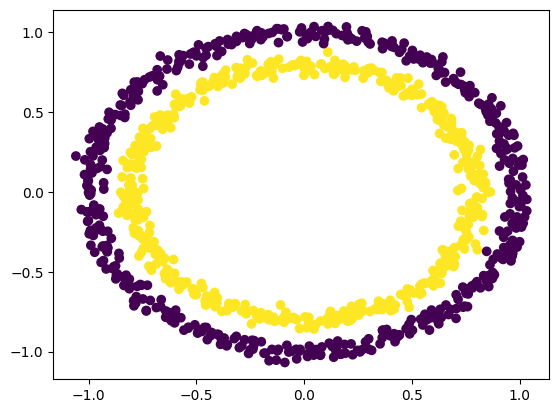

In [51]:
plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y)

In [52]:
import torch

In [53]:
 X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [54]:
X[:5]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [57]:
len(X_train)

800

In [58]:
import torch.nn as nn

In [59]:
class Cir(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2,
                             out_features = 8)
    self.layer_2 = nn.Linear(in_features = 8,
                             out_features = 1)
  def forward(self,x):
    return self.layer_2(self.layer_1(x))

In [60]:
torch.manual_seed(42)
model_0 = Cir()
model_0

Cir(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [61]:
# Next step is to setup the loss function and the optimizer
# For binary classification we can choose 2 loss functions - binary cross entropy and categorical cross entropy
# For optimizers we can choose between SGD and Adam

In [104]:
loss_fn = nn.BCEWithLogitsLoss() # This has builtin sigmoid activation function
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [131]:
def accu(y_true,y_pred):
  return torch.eq(y_true,y_pred).sum().item()*100/len(y_pred)
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [65]:
# Logits -> raw outputs from the layers
# the predictions whch we are getting from the model are raw logits
# we need to pass them through sigmoid function and round the values
# We use sigmoid function for the softmax for multiclassification

In [66]:
y_pr = model_0(X_test)
y_pr[:5]

tensor([[-0.3104],
        [-0.4788],
        [ 0.1177],
        [-0.4316],
        [ 0.0967]], grad_fn=<SliceBackward0>)

In [67]:
y_pr = torch.sigmoid(y_pr)
y_pr[:5]

tensor([[0.4230],
        [0.3825],
        [0.5294],
        [0.3937],
        [0.5242]], grad_fn=<SliceBackward0>)

In [68]:
accu(y_test,torch.round(y_pr))

10000.0

In [69]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [70]:
torch.round(y_pr[:5])

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], grad_fn=<RoundBackward0>)

In [81]:
epochs = 1000

In [ ]:
for epoch in range(epochs):
  model_0.train()
  pred = model_0(X_train).squeeze()
  temp = torch.round(torch.sigmoid(pred))
  loss = loss_fn(pred,y_train)            # BCEWithLogitsLoss -> expects raw logits     BCE expects sigmoid probabilities

  optimizer.zero_grad()  # updates the gradients as 0

  loss.backward()        # Back Propagation

  optimizer.step()       # Gradient Descent

  model_0.eval()
  with torch.inference_mode():
    test = model_0(X_test).squeeze()
    tempi = torch.round(torch.sigmoid(test))
    los = loss_fn(test,y_test)
  if epoch%25 == 0:
    print(f"epoch: {epoch}  train loss: {loss}  test loss: {los}")
    model_0.state_dict()

In [41]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('layer_1.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('layer_2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003]])),
             ('layer_2.bias', tensor([0.2730]))])

In [83]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5210,  0.5421],
                      [-0.1758,  0.6263],
                      [-0.1669,  0.1152],
                      [-0.3660,  0.3652],
                      [ 0.6226, -0.5206],
                      [ 0.5775,  0.0469],
                      [ 0.5677,  0.2004],
                      [ 0.3050, -0.1829]])),
             ('layer_1.bias',
              tensor([ 0.5417,  0.1019, -0.3299,  0.1800, -0.3244, -0.0832, -0.2914,  0.4707])),
             ('layer_2.weight',
              tensor([[-0.0566, -0.0036, -0.0812, -0.1465, -0.0356, -0.2499,  0.4299, -0.3032]])),
             ('layer_2.bias', tensor([0.2672]))])

In [85]:
import requests
from pathlib import Path

if Path('helper.py').is_file():
  print('Already Exists')
else:
  req = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper.py', 'wb') as f:
    f.write(req.content)

Already Exists


In [86]:
from helper import plot_predictions, plot_decision_boundary

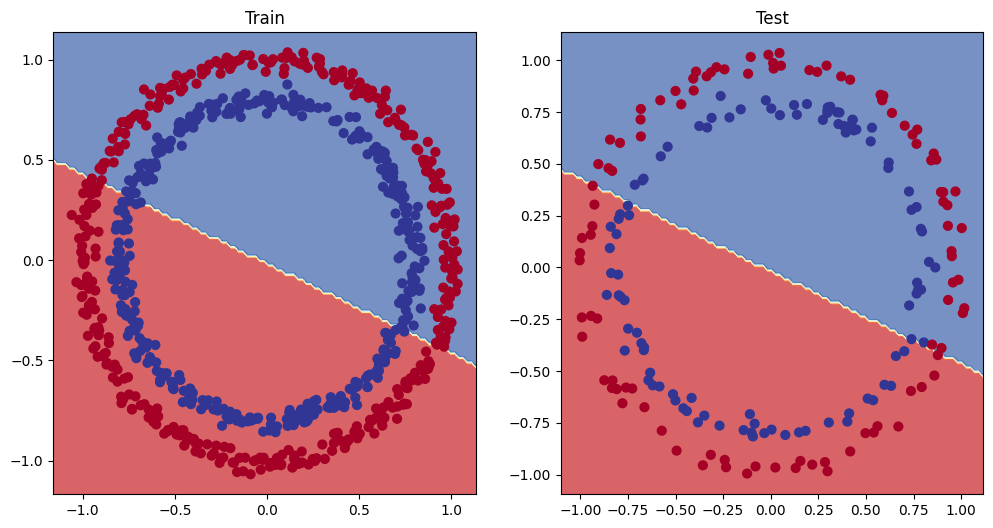

In [89]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [93]:
# Improving the model:
# 1. Add more layers
# 2. Add more hidden units
# 3. Train for more epochs
# 4. Change the activation function
# 5. Change the learning rate
# 6. Change the loss function

In [94]:
# experimenting the model by adding these changes

In [101]:
class Cir1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2,
                             out_features = 16)
    self.layer_2 = nn.Linear(in_features = 16,
                             out_features = 16)
    self.layer_3 = nn.Linear(in_features = 16,
                             out_features = 1)
  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [106]:
torch.manual_seed(42)
model_1 = Cir1()
model_1

Cir1(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
)

In [105]:
loss_fn = nn.BCEWithLogitsLoss() # This has builtin sigmoid activation function
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [118]:
epochs = 1001

In [108]:
for epoch in range(1,epochs):
  model_1.train()
  pred = model_1(X_train).squeeze()
  temp = torch.round(torch.sigmoid(pred))
  loss = loss_fn(pred,y_train)            # BCEWithLogitsLoss -> expects raw logits     BCE expects sigmoid probabilities

  optimizer.zero_grad()  # updates the gradients as 0

  loss.backward()        # Back Propagation

  optimizer.step()       # Gradient Descent

  model_1.eval()
  with torch.inference_mode():
    test = model_1(X_test).squeeze()
    tempi = torch.round(torch.sigmoid(test))
    los = loss_fn(test,y_test)
  if epoch%25 == 0:
    print(f"epoch: {epoch}  train loss: {loss}  test loss: {los}")
    # model_1.state_dict()

epoch: 0  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 25  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 50  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 75  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 100  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 125  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 150  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 175  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 200  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 225  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 250  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 275  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 300  train loss: 0.6961794495582581  test loss: 0.693757176399231
epoch: 325  train loss: 0.6961794495582581  test loss: 0

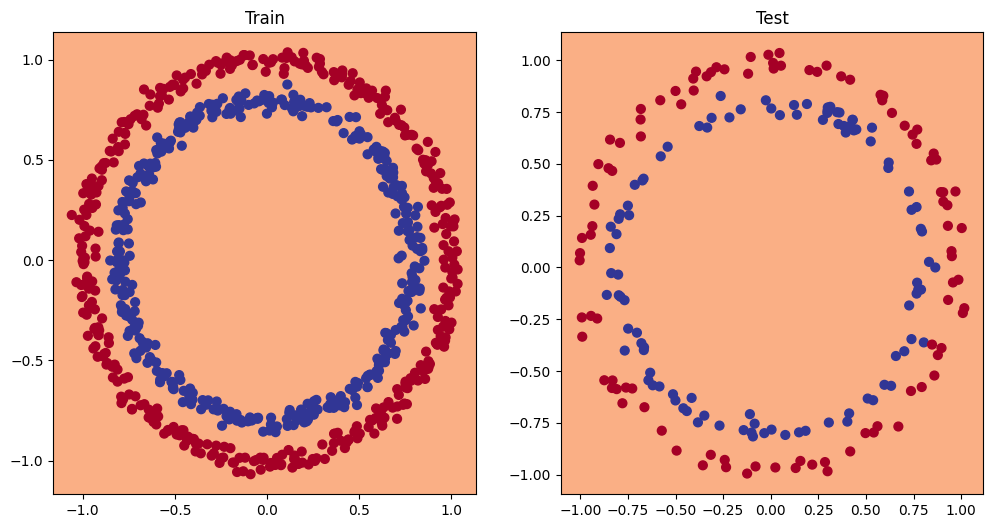

In [111]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [138]:
class Cir2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2,
                             out_features = 16)
    self.layer_2 = nn.Linear(in_features = 16,
                             out_features = 16)
    self.layer_3 = nn.Linear(in_features = 16,
                             out_features = 1)
    self.relu = nn.ReLU()   # Non Linear Activation function
  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [139]:

model_2 = Cir2()
model_2

Cir2(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [140]:
loss_fn = nn.BCEWithLogitsLoss() # This has builtin sigmoid activation function
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

In [141]:
for epoch in range(1,epochs):
  model_2.train()
  pred = model_2(X_train).squeeze()
  temp = torch.round(torch.sigmoid(pred))
  loss = loss_fn(pred,y_train)            # BCEWithLogitsLoss -> expects raw logits     BCE expects sigmoid probabilities
  acc = accuracy_fn(y_true=y_train,
                    y_pred=temp)
  optimizer.zero_grad()  # updates the gradients as 0

  loss.backward()        # Back Propagation

  optimizer.step()       # Gradient Descent

  model_2.eval()
  with torch.inference_mode():
    test = model_2(X_test).squeeze()
    tempi = torch.round(torch.sigmoid(test))
    los = loss_fn(test,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=tempi)
  if epoch%25 == 0:
    # print(f"epoch: {epoch}  train loss: {loss}  test loss: {los}")
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {los:.4f}, Test Acc: {test_acc:.2f}%")
    # model_1.state_dict()

Epoch: 25 | Loss: 0.6950, Acc: 48.75% | Test Loss: 0.6936, Test Acc: 53.50%
Epoch: 50 | Loss: 0.6938, Acc: 43.25% | Test Loss: 0.6927, Test Acc: 50.00%
Epoch: 75 | Loss: 0.6928, Acc: 51.88% | Test Loss: 0.6920, Test Acc: 55.50%
Epoch: 100 | Loss: 0.6919, Acc: 56.12% | Test Loss: 0.6913, Test Acc: 59.50%
Epoch: 125 | Loss: 0.6910, Acc: 57.75% | Test Loss: 0.6907, Test Acc: 60.50%
Epoch: 150 | Loss: 0.6900, Acc: 63.38% | Test Loss: 0.6899, Test Acc: 64.50%
Epoch: 175 | Loss: 0.6890, Acc: 71.50% | Test Loss: 0.6892, Test Acc: 70.00%
Epoch: 200 | Loss: 0.6879, Acc: 70.75% | Test Loss: 0.6883, Test Acc: 66.00%
Epoch: 225 | Loss: 0.6867, Acc: 69.12% | Test Loss: 0.6874, Test Acc: 67.50%
Epoch: 250 | Loss: 0.6854, Acc: 69.25% | Test Loss: 0.6864, Test Acc: 66.50%
Epoch: 275 | Loss: 0.6838, Acc: 68.25% | Test Loss: 0.6852, Test Acc: 65.50%
Epoch: 300 | Loss: 0.6821, Acc: 68.12% | Test Loss: 0.6840, Test Acc: 65.50%
Epoch: 325 | Loss: 0.6801, Acc: 68.75% | Test Loss: 0.6825, Test Acc: 65.50%
Ep

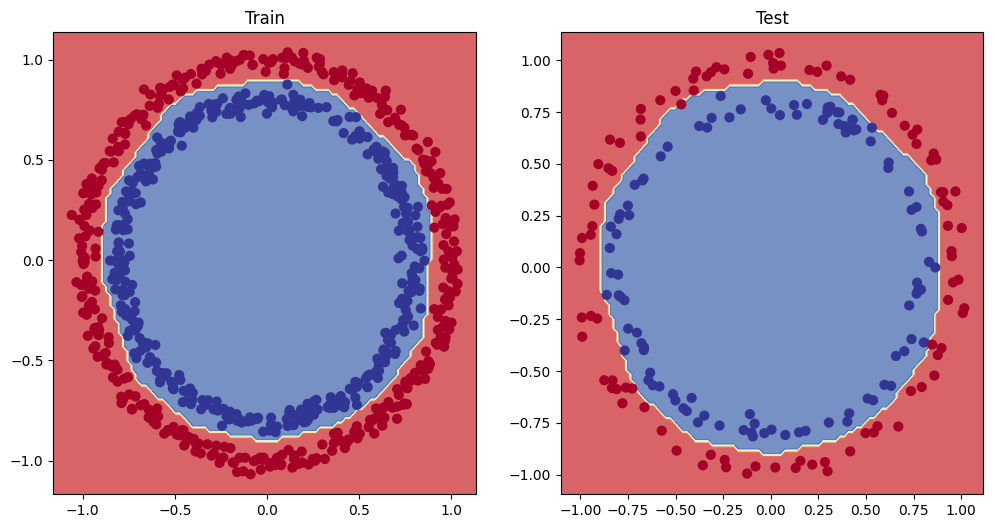

In [142]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

In [143]:
# Multi Class Classification

In [144]:
from sklearn.datasets import make_blobs

In [146]:
X_blobs,y_blobs = make_blobs(n_samples=1000,
                             n_features=2,
                             centers=4,
                             random_state=42,
                             cluster_std = 1.5)

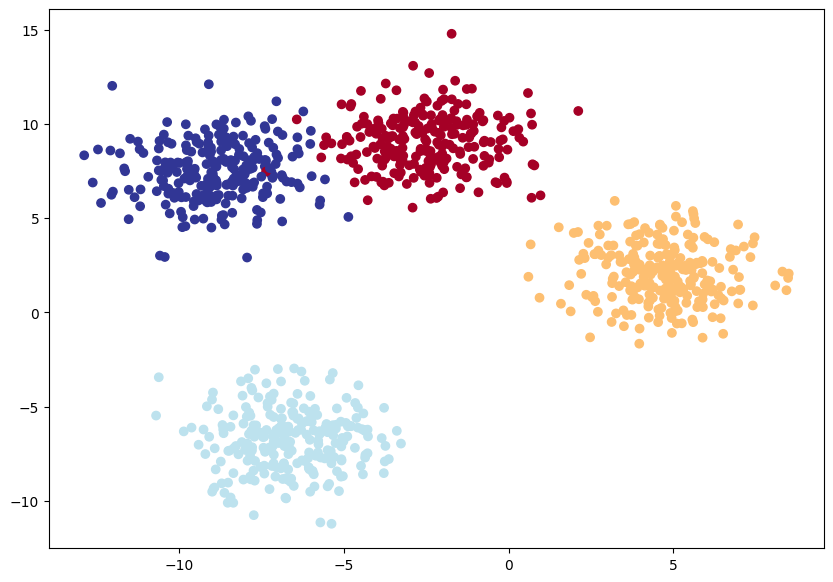

In [147]:
X_blobs = torch.from_numpy(X_blobs).type(torch.float)
y_blobs = torch.from_numpy(y_blobs).type(torch.float)
X_train,X_test, y_train, y_test = train_test_split(X_blobs,y_blobs,test_size = 0.2, random_state = 42)
plt.figure(figsize=(10, 7))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap=plt.cm.RdYlBu);